***IMPORTING LIBRARIES AND DATASET***

In [3]:
import numpy as np
import pandas as pd
        

In [53]:
column_names = ['user_id','item_id','rating','timestamp']

*RATINGS DATASET*

In [31]:
ddf = pd.read_csv('u.data',sep = '\t', names = column_names)

In [47]:
ddf.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [55]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
title        100003 non-null object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


*MOVIE TITLES DATASET*

In [51]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [52]:
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
item_id    1682 non-null int64
title      1682 non-null object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [13]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


**ANALYSING THE MERGED DATASET**

In [33]:
ddf = pd.merge(ddf,movie_titles,on='item_id')

In [34]:
ddf.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [20]:
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns

In [24]:
%matplotlib inline

In [36]:
ddf.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [38]:
ddf.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [40]:
ratings = pd.DataFrame(ddf.groupby('title')['rating'].mean())

In [42]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [44]:
ratings['no of ratings']= pd.DataFrame(ddf.groupby('title')['rating'].count())

In [109]:
ratings.head()

,rating,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


**VISUALIZING THE DATA**

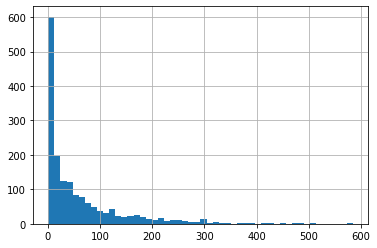

In [58]:
ratings['no of ratings'].hist(bins=50)

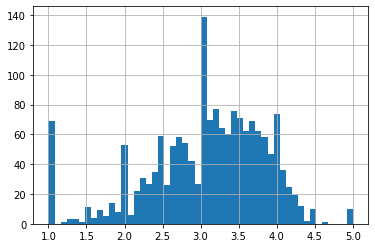

In [61]:
ratings['rating'].hist(bins=50)

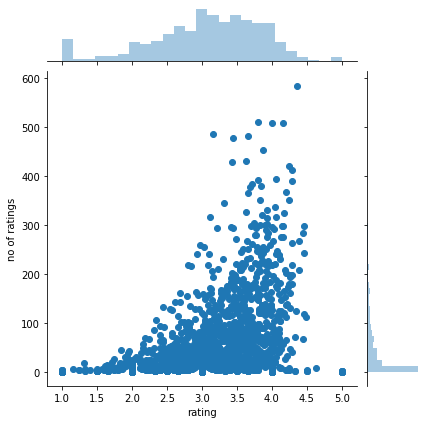

In [63]:
sns.jointplot(x='rating',y='no of ratings',data = ratings)

In [65]:
moviemat = ddf.pivot_table(index= 'user_id', columns = 'title', values='rating')

In [67]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
ratings.sort_values('no of ratings',ascending=False)

,rating,no of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [71]:
starwars_user_ratings = moviemat['Star Wars (1977)']
fargo_user_ratings = moviemat['Fargo (1996)']


In [110]:
starwars_user_ratings


user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

**DISTINGUISHING DATA ON THE BASIS OF CORRELATION**

In [76]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

In [78]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [80]:
similar_to_fargo = moviemat.corrwith(fargo_user_ratings)

In [82]:
similar_to_fargo

title
'Til There Was You (1997)                0.100000
1-900 (1994)                             0.866025
101 Dalmatians (1996)                   -0.245368
12 Angry Men (1957)                      0.098676
187 (1997)                               0.142509
                                           ...   
Young Guns II (1990)                    -0.018688
Young Poisoner's Handbook, The (1995)   -0.034345
Zeus and Roxanne (1997)                 -0.353553
unknown                                 -0.101768
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [98]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlation'])
corr_starwars.dropna(inplace = True)

In [99]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [100]:
corr_starwars.sort_values('Correlation',ascending=False)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
...,...
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0
I Like It Like That (1994),-1.0


In [101]:
corr_starwars = pd.merge(corr_starwars,ratings,on='title')

In [103]:
corr_starwars

,Correlation,rating,no of ratings
title,,,
'Til There Was You (1997),0.872872,2.333333,9
1-900 (1994),-0.645497,2.600000,5
101 Dalmatians (1996),0.211132,2.908257,109
12 Angry Men (1957),0.184289,4.344000,125
187 (1997),0.027398,3.024390,41
...,...,...,...
Young Guns (1988),0.186377,3.207921,101
Young Guns II (1990),0.228615,2.772727,44
"Young Poisoner's Handbook, The (1995)",-0.007374,3.341463,41


**FINDING THE RECOMMENDED MOVIES(BASE MOVIE: STAR WARS(1977) )**

In [108]:
corr_starwars[corr_starwars['no of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,rating,no of ratings
title,,,
Star Wars (1977),1.000000,4.359589,584
"Empire Strikes Back, The (1980)",0.748353,4.206522,368
Return of the Jedi (1983),0.672556,4.007890,507
Raiders of the Lost Ark (1981),0.536117,4.252381,420
Austin Powers: International Man of Mystery (1997),0.377433,3.246154,130


*IF YOU HAVE WATCHED AND LIKED STAR WARS THEN THIS RECOMMENDATION SYSTEM WILL SUGGEST YOU THE ABOVE TOP 5 MOVIES(which makes sense).*

In [123]:
corr_fargo = pd.DataFrame(similar_to_fargo, columns = ['Correlation'])

In [124]:
corr_fargo.dropna(inplace=True)

In [125]:
corr_fargo

,Correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509
...,...
Young Guns (1988),0.050227
Young Guns II (1990),-0.018688
"Young Poisoner's Handbook, The (1995)",-0.034345


In [126]:
corr_fargo = pd.merge(corr_fargo,ratings,on='title')

In [128]:
corr_fargo


,Correlation,rating,no of ratings
title,,,
'Til There Was You (1997),0.100000,2.333333,9
1-900 (1994),0.866025,2.600000,5
101 Dalmatians (1996),-0.245368,2.908257,109
12 Angry Men (1957),0.098676,4.344000,125
187 (1997),0.142509,3.024390,41
...,...,...,...
Young Guns (1988),0.050227,3.207921,101
Young Guns II (1990),-0.018688,2.772727,44
"Young Poisoner's Handbook, The (1995)",-0.034345,3.341463,41


In [130]:
corr_fargo[corr_fargo['no of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,rating,no of ratings
title,,,
Fargo (1996),1.000000,4.155512,508
Sling Blade (1996),0.381159,4.198529,136
Lone Star (1996),0.370915,4.053476,187
Quiz Show (1994),0.355031,3.645714,175
Lawrence of Arabia (1962),0.353408,4.231214,173


*SO ACCORDING TO THE DATASET, PEOPLE WHO HAVE WATCHED FARGO HAVE ALSO WATCHED THE OTHER MOVIES. THEREFORE THESE ARE THE SET OF MOVIES RECOMMENDED IF YOU'VE WATCHED FARGO*